In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [106]:
#reading data
consumption_df = pd.read_csv('energy_consumption.date.csv')
weather_df = pd.read_csv('weather_seperated (2).csv')

In [107]:
#see which columns are in the data
print(consumption_df.columns)
print(weather_df.columns)

Index(['hour', 'day', 'month', 'year', 'Consumption_kWh'], dtype='object')
Index(['hour', 'day', 'month', 'year', 'temperature(°C)', 'humidity(%)',
       'cloudcover(%)', 'windspeed(km/h)', 'irrediance(W/m²)'],
      dtype='object')


In [108]:
#combine data sets
df = pd.merge(consumption_df, weather_df, 
                       on=['hour', 'day', 'month', 'year'], 
                       how='inner')


In [109]:
df

,hour,day,month,year,Consumption_kWh,temperature(°C),humidity(%),cloudcover(%),windspeed(km/h),irrediance(W/m²)
0,0,9,7,2023,6.871123,21.6,69,21,20.8,0.0
1,1,9,7,2023,6.712378,21.4,66,30,22.0,0.0
2,2,9,7,2023,6.908867,21.2,67,33,22.0,0.0
3,3,9,7,2023,7.127702,20.4,62,49,21.9,0.0
4,4,9,7,2023,6.688406,20.3,62,100,19.7,0.0
...,...,...,...,...,...,...,...,...,...,...
8780,20,8,7,2024,6.063277,25.7,80,0,22.4,35.3
8781,21,8,7,2024,6.485928,24.8,84,0,20.0,0.0
8782,22,8,7,2024,6.542832,24.3,83,0,18.7,0.0
8783,23,8,7,2024,5.955779,23.7,87,0,18.8,0.0


In [110]:
#newly created data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hour              8785 non-null   int64  
 1   day               8785 non-null   int64  
 2   month             8785 non-null   int64  
 3   year              8785 non-null   int64  
 4   Consumption_kWh   8785 non-null   float64
 5   temperature(°C)   8785 non-null   float64
 6   humidity(%)       8785 non-null   int64  
 7   cloudcover(%)     8785 non-null   int64  
 8   windspeed(km/h)   8785 non-null   float64
 9   irrediance(W/m²)  8785 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 686.5 KB


In [111]:
#checking for empty columns in new data set
print(df.isnull().sum())

hour                0
day                 0
month               0
year                0
Consumption_kWh     0
temperature(°C)     0
humidity(%)         0
cloudcover(%)       0
windspeed(km/h)     0
irrediance(W/m²)    0
dtype: int64


In [112]:
#correlation calculation
correlation_matrix = df.corr()

In [113]:
#hour day year external correlation calculation
filtered_correlation_matrix = correlation_matrix.drop(columns=['hour', 'day', 'year'], errors='ignore')
filtered_correlation_matrix = filtered_correlation_matrix.drop(index=['hour', 'day', 'year'], errors='ignore')

In [114]:
#Correlation according to energy consumed 
Consumption_energy_correlations = filtered_correlation_matrix['Consumption_kWh'].sort_values(ascending=False)
Consumption_energy_correlations

Consumption_kWh     1.000000
humidity(%)         0.177143
cloudcover(%)       0.107914
irrediance(W/m²)    0.054050
windspeed(km/h)    -0.174406
temperature(°C)    -0.439827
month              -0.763108
Name: Consumption_kWh, dtype: float64

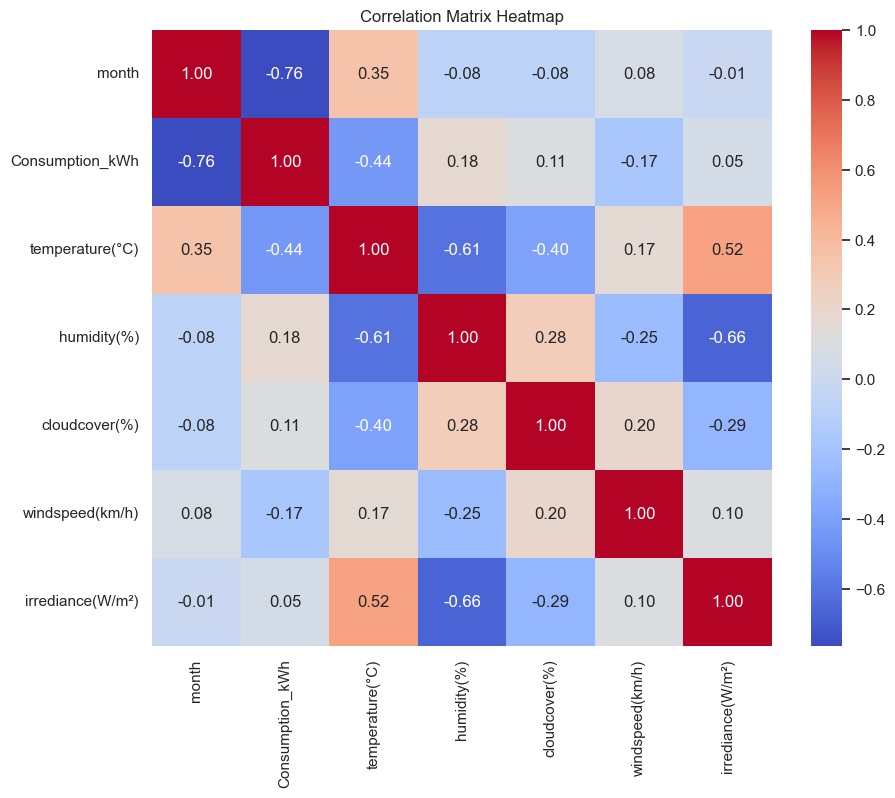

In [115]:
#correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

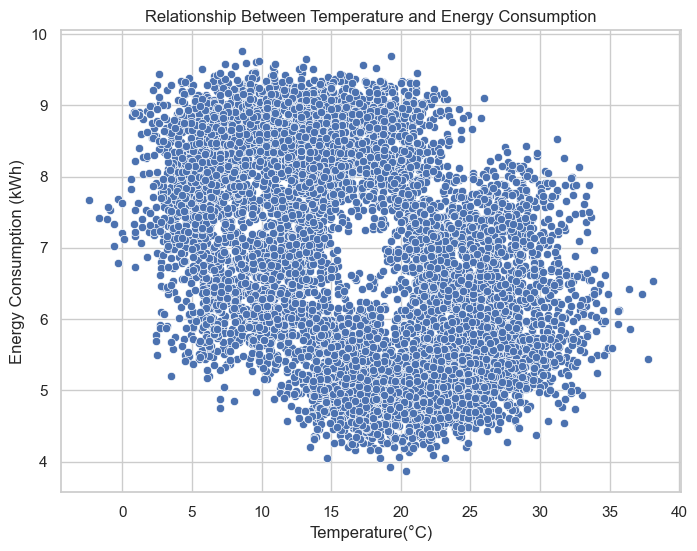

In [116]:
#Scatter plot showing the relationship between temperature and consumed energy
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature(°C)', y='Consumption_kWh', data=df)
plt.title('Relationship Between Temperature and Energy Consumption')
plt.xlabel('Temperature(°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

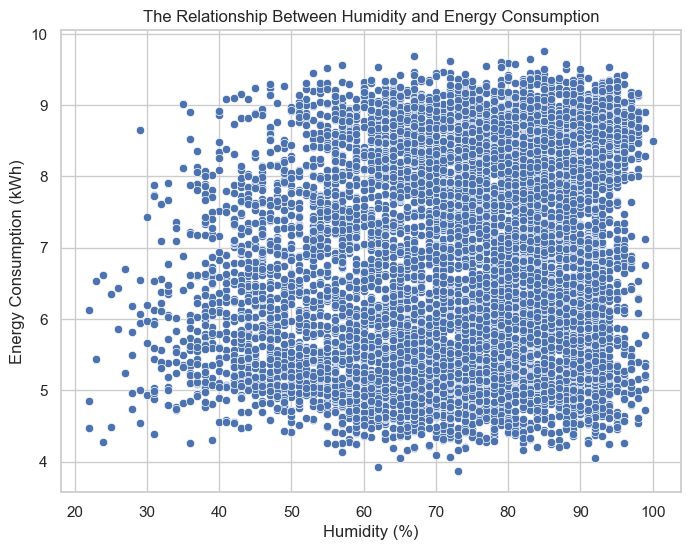

In [117]:
#Scatter chart showing the relationship between humidity rate and consumed energy
plt.figure(figsize=(8, 6))
sns.scatterplot(x='humidity(%)', y='Consumption_kWh', data=df)
plt.title('The Relationship Between Humidity and Energy Consumption')
plt.xlabel('Humidity (%)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

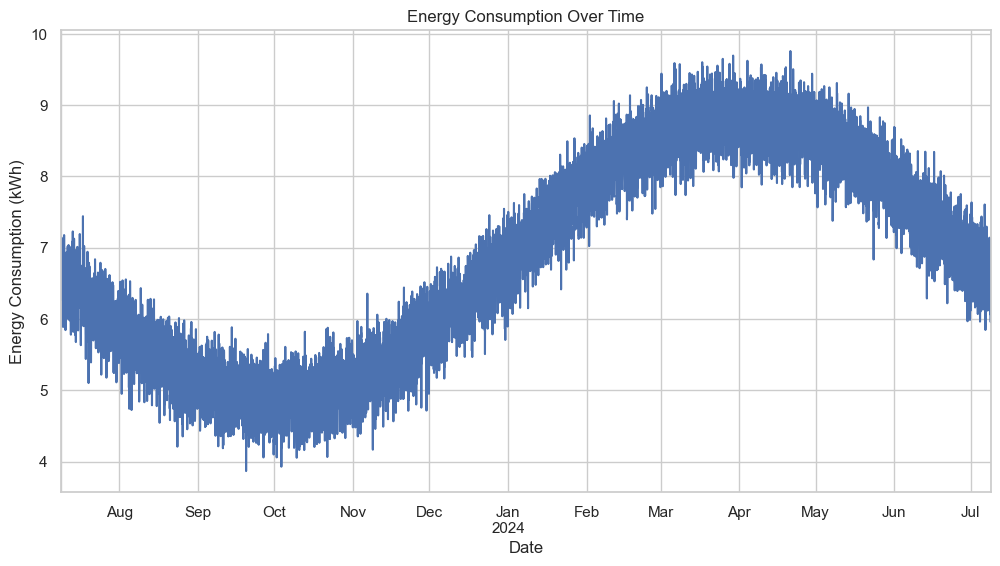

In [118]:
#Time series chart by grouping data by hour
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df = df.set_index('datetime')

plt.figure(figsize=(12, 6))
df['Consumption_kWh'].plot(title='Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

C:\Users\EOS\AppData\Local\Temp\ipykernel_11432\4187856878.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Consumption_kWh'].resample('M').mean()


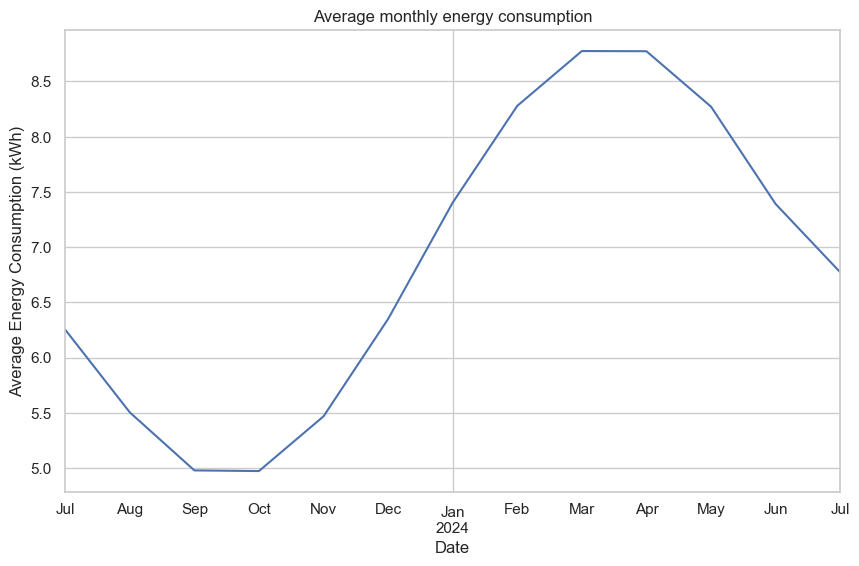

In [120]:
#Average monthly energy consumption
monthly_avg = df['Consumption_kWh'].resample('M').mean()

plt.figure(figsize=(10, 6))
monthly_avg.plot(title='Average monthly energy consumption')
plt.xlabel('Date')
plt.ylabel('Average Energy Consumption (kWh)')
plt.show()

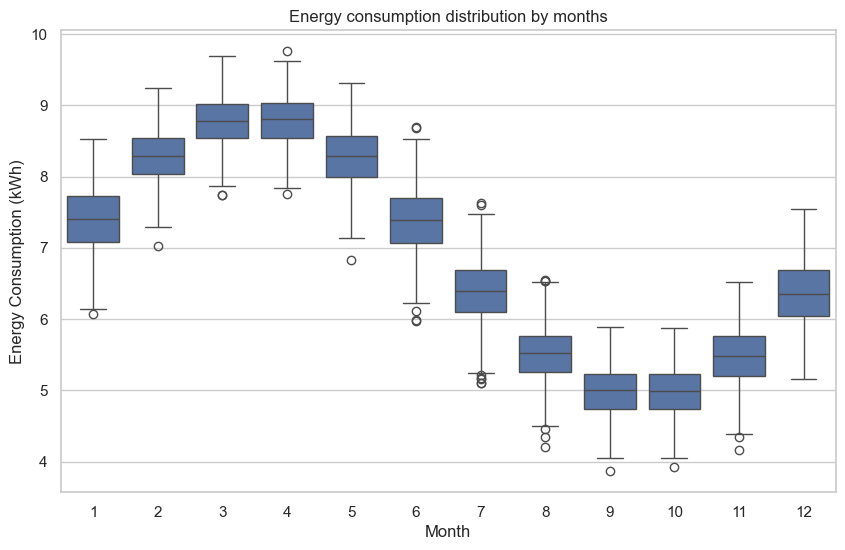

In [121]:
# Energy consumption distribution by months
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='Consumption_kWh', data=df)
plt.title('Energy consumption distribution by months')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

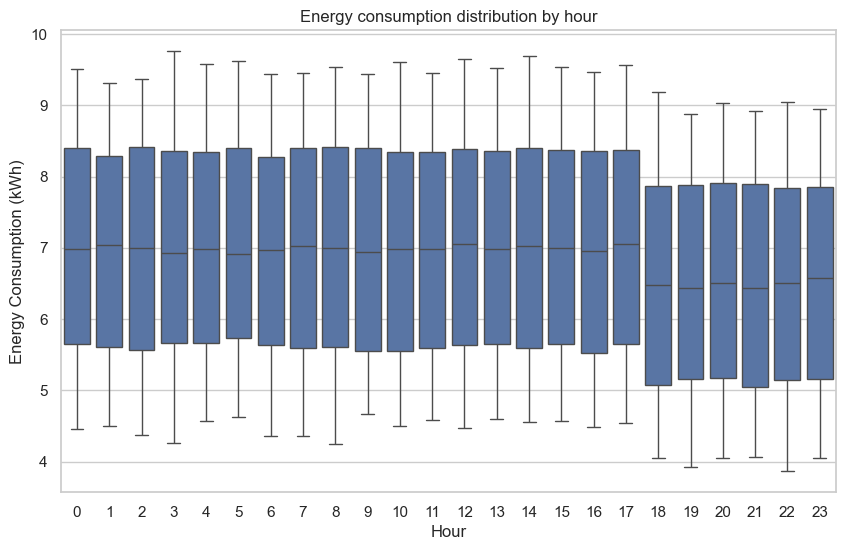

In [122]:
# Energy consumption distribution by hour
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='Consumption_kWh', data=df)
plt.title('Energy consumption distribution by hour')
plt.xlabel('Hour')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

In [123]:
#saving newly created dataset as csv file
df.to_csv('merged_energy_weather_data.csv', index=False)


# Train

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define features and target
X = df[['temperature(°C)', 'humidity(%)', 'cloudcover(%)', 'windspeed(km/h)', 'irrediance(W/m²)']]
y = df['Consumption_kWh']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Making predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluating model success
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression R2: {r2_lr}")


Linear Regression MAE: 1.0319531612334767
Linear Regression R2: 0.29317973492055927


In [125]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Define features and target
X = df[['temperature(°C)', 'humidity(%)', 'cloudcover(%)', 'windspeed(km/h)', 'irrediance(W/m²)']]
y = df['Consumption_kWh']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
dt_model = DecisionTreeRegressor()

# Train the model
dt_model.fit(X_train, y_train)

# Making predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluating model success
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Regressor MAE: {mae_dt}")
print(f"Decision Tree Regressor R2: {r2_dt}")


Decision Tree Regressor MAE: 0.9457464361710917
Decision Tree Regressor R2: 0.09776911547989298


In [126]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Define features and target
X = df[['temperature(°C)', 'humidity(%)', 'cloudcover(%)', 'windspeed(km/h)', 'irrediance(W/m²)']]
y = df['Consumption_kWh']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Making predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluating model success
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"Support Vector Regressor MAE: {mae_svr}")
print(f"Support Vector Regressor R2: {r2_svr}")


Support Vector Regressor MAE: 1.025543015606394
Support Vector Regressor R2: 0.2779739581450392


In [127]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Define features and target
X = df[['temperature(°C)', 'humidity(%)', 'cloudcover(%)', 'windspeed(km/h)', 'irrediance(W/m²)']]
y = df['Consumption_kWh']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
gb_model = GradientBoostingRegressor()

# Train the model
gb_model.fit(X_train, y_train)

# Making predicitons
y_pred_gb = gb_model.predict(X_test)

# Evaluating model success
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting Regressor MAE: {mae_gb}")
print(f"Gradient Boosting Regressor R2: {r2_gb}")


Gradient Boosting Regressor MAE: 0.9014446947036036
Gradient Boosting Regressor R2: 0.41348878567680925


In [128]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Define features and target
X = df[['temperature(°C)', 'humidity(%)', 'cloudcover(%)', 'windspeed(km/h)', 'irrediance(W/m²)']]
y = df['Consumption_kWh']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Making predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluating model success
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN Regressor MAE: {mae_knn}")
print(f"KNN Regressor R2: {r2_knn}")


KNN Regressor MAE: 0.9210334419072285
KNN Regressor R2: 0.31794449487745147


In [129]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Define features and target
X = df[['temperature(°C)', 'humidity(%)', 'cloudcover(%)', 'windspeed(km/h)', 'irrediance(W/m²)']]
y = df['Consumption_kWh']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

# Making predictions
y_pred_ridge = ridge_model.predict(X_test)

#Evaluating model success
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression MAE: {mae_ridge}")
print(f"Ridge Regression R2: {r2_ridge}")


Ridge Regression MAE: 1.0319532950904302
Ridge Regression R2: 0.29317981614365984


In [130]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Define features and target
X = df[['temperature(°C)', 'humidity(%)', 'cloudcover(%)', 'windspeed(km/h)', 'irrediance(W/m²)']]
y = df['Consumption_kWh']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
lasso_model = Lasso(alpha=0.1)

# Train the model
lasso_model.fit(X_train, y_train)

# Making predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluating model success
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression MAE: {mae_lasso}")
print(f"Lasso Regression R2: {r2_lasso}")


Lasso Regression MAE: 1.0336747977264478
Lasso Regression R2: 0.2937458923333227


In [131]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Define features and target
X = df[['temperature(°C)', 'humidity(%)', 'cloudcover(%)', 'windspeed(km/h)', 'irrediance(W/m²)']]
y = df['Consumption_kWh']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create the model
xgb_model = XGBRegressor()

# Train the model
xgb_model.fit(X_train, y_train)

# Making predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating model success
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Regressor MAE: {mae_xgb}")
print(f"XGBoost Regressor R2: {r2_xgb}")


XGBoost Regressor MAE: 0.814130712511989
XGBoost Regressor R2: 0.4587843979665448


In [132]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

# Define features and target
X = df[['temperature(°C)', 'humidity(%)', 'cloudcover(%)', 'windspeed(km/h)', 'irrediance(W/m²)']]
y = df['Consumption_kWh']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
ada_model = AdaBoostRegressor()

# Train the model
ada_model.fit(X_train, y_train)

# Making predictions
y_pred_ada = ada_model.predict(X_test)

# Evaluating model success
mae_ada = mean_absolute_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)
print(f"AdaBoost Regressor MAE: {mae_ada}")
print(f"AdaBoost Regressor R2: {r2_ada}")


AdaBoost Regressor MAE: 1.0200496973792137
AdaBoost Regressor R2: 0.33801890747685015


In [133]:
import pandas as pd

# Data including model names and results
results = {
    "Model": ["Linear Regression", "Decision Tree", "Support Vector", "Gradient Boosting",
              "KNN", "Ridge", "Lasso", "XGBoost", "AdaBoost"],
    "MAE": [mae_lr, mae_dt, mae_svr, mae_gb, mae_knn, mae_ridge, mae_lasso, mae_xgb, mae_ada],
    "R2": [r2_lr, r2_dt, r2_svr, r2_gb, r2_knn, r2_ridge, r2_lasso, r2_xgb, r2_ada]
}

# Create the DataFrame 
results_df = pd.DataFrame(results)

# Rendering the table
results_df


,Model,MAE,R2
0,Linear Regression,1.031953,0.293180
1,Decision Tree,0.945746,0.097769
2,Support Vector,1.025543,0.277974
3,Gradient Boosting,0.901445,0.413489
4,KNN,0.921033,0.317944
5,Ridge,1.031953,0.293180
6,Lasso,1.033675,0.293746
7,XGBoost,0.814131,0.458784
8,AdaBoost,1.020050,0.338019


In [134]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# 1. En iyi p, d, q değerlerini bulmak için auto_arima kullanma
model = auto_arima(y_train, seasonal=False, trace=True)
print(model.summary())

# 2. auto_arima sonuçlarından p, d, q değerlerini alma
p = model.order[0]
d = model.order[1]
q = model.order[2]

# 3. ARIMA modeli oluşturma
arima_model = ARIMA(y_train, order=(p, d, q))

# 4. Modeli eğitme
arima_model_fit = arima_model.fit()

# 5. Tahmin yapma
y_pred_arima = arima_model_fit.forecast(steps=len(X_test))

# 6. Tahminleri değerlendirme
mae_arima = mean_absolute_error(y_test, y_pred_arima)
r2_arima = r2_score(y_test, y_pred_arima)
print(f"ARIMA MAE: {mae_arima}")
print(f"ARIMA R2: {r2_arima}")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=2.95 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47352.311, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=29894.139, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=41036.979, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=27935.017, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.50 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=1.33 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=1.97 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=25144.008, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=25142.134, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=25140.271, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=25142.136, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=25144.140, Time=1.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
To

C:\Users\EOS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\EOS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\EOS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\EOS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic 

ARIMA MAE: 1.2880278357858237
ARIMA R2: -5.653150911055782e-05


C:\Users\EOS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\EOS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


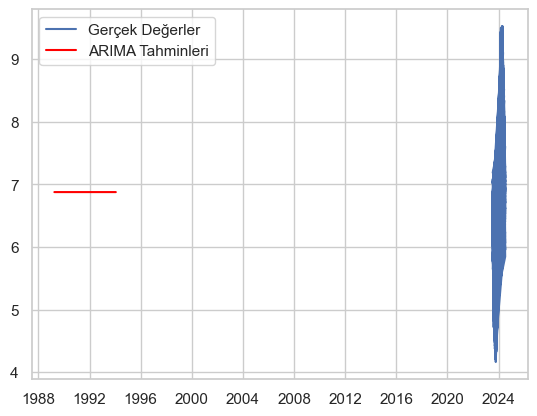

In [135]:
# 7. Tahminleri görselleştirme
plt.plot(y_test, label='Gerçek Değerler')
plt.plot(y_pred_arima, label='ARIMA Tahminleri', color='red')
plt.legend()
plt.show()


In [136]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt


model = auto_arima(y_train, seasonal=False, trace=True)
print(model.summary())

# 2. auto_arima sonuçlarından p, d, q değerlerini alma
p = model.order[0]
d = model.order[1]
q = model.order[2]
# SARIMA modeli oluşturma (p,d,q ve mevsimsel P,D,Q,S değerlerini optimize etmek gerekebilir)
sarima_model = SARIMAX(y_train, order=(p, d, q), seasonal_order=(P, D, Q, S))

# Modeli eğitme
sarima_model_fit = sarima_model.fit()

# Tahmin yapma
y_pred_sarima = sarima_model_fit.forecast(steps=len(X_test))

# Tahminleri değerlendirme
mae_sarima = mean_absolute_error(y_test, y_pred_sarima)
r2_sarima = r2_score(y_test, y_pred_sarima)
print(f"SARIMA MAE: {mae_sarima}")
print(f"SARIMA R2: {r2_sarima}")

# Tahminleri görselleştirme
plt.plot(y_test, label='Gerçek Değerler')
plt.plot(y_pred_sarima, label='SARIMA Tahminleri', color='red')
plt.legend()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=3.56 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=47352.311, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=29894.139, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=41036.979, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=27935.017, Time=0.22 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.50 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=1.43 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=2.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=25144.008, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=25142.134, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=25140.271, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=25142.136, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=25144.140, Time=0.89 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
To

NameError: name 'P' is not defined

C:\Users\EOS\AppData\Local\Temp\ipykernel_11432\1821061996.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")
C:\Users\EOS\AppData\Local\Temp\ipykernel_11432\1821061996.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")


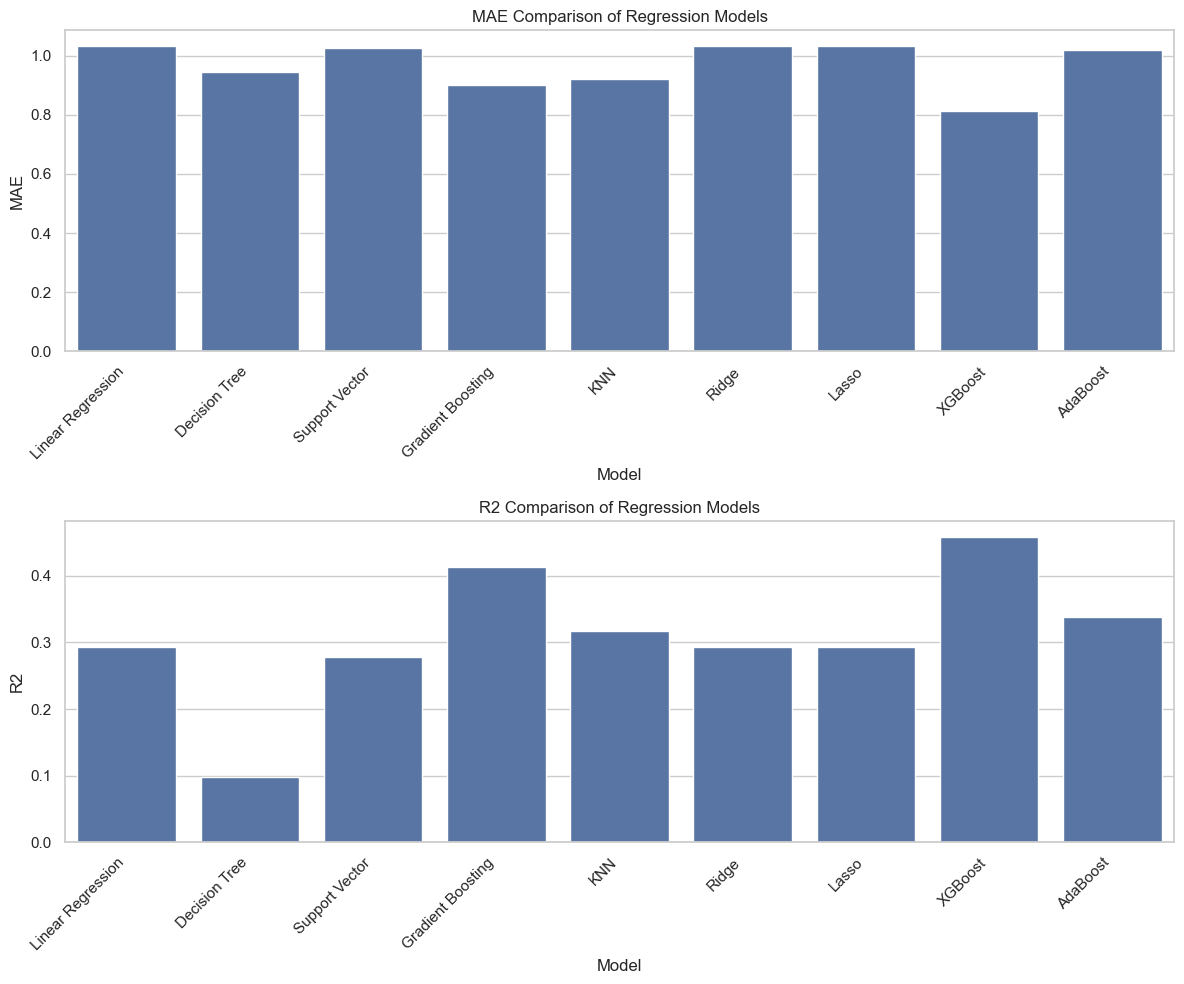

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style setting for visualization
sns.set(style="whitegrid")

# Creating subplots to compare MAE and R2 values
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# MAE Chart 
sns.barplot(x="Model", y="MAE", data=results_df, ax=ax[0])
ax[0].set_title("MAE Comparison of Regression Models")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")

# R2 Chart 
sns.barplot(x="Model", y="R2", data=results_df, ax=ax[1])
ax[1].set_title("R2 Comparison of Regression Models")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")

# Displaying the charts
plt.tight_layout()
plt.show()


### _R²:_
#### It shows how well the model explains the variance of the dependent variable. As the R² value approaches 1, the success of the model increases.

### _MAE (Mean Absolute Error):_ 
#### It shows the average absolute error of the model's predictions. The smaller the MAE value, the better the performance of the model.

In [138]:
import joblib
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Model examples
models = {
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Make sure training and testing data are defined
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate R² scores for each model
model_scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions with test data
    r2 = r2_score(y_test, y_pred)  # Calculate R² score
    model_scores[model_name] = r2  # save score

# Choose the model with the highest R² score
best_model_name = max(model_scores, key=model_scores.get)
best_r2_score = model_scores[best_model_name]

# Choose the best model and train it again (with all training data, not test data)
best_model_instance = models[best_model_name]
best_model_instance.fit(X_train, y_train)

# save the model
filename = f"{best_model_name.replace(' ', '_')}_Model.joblib"
joblib.dump(best_model_instance, filename)

print(f"The best model was chosen as '{best_model_name}'. R² score: {best_r2_score:.2f}. The model is saved as '{filename}'.")

The best model was chosen as 'XGBoost'. R² score: 0.46. The model is saved as 'XGBoost_Model.joblib'.


In [139]:
import joblib
from sklearn.metrics import mean_absolute_error, r2_score

# Installation process
loaded_model = joblib.load('XGBoost_Model.joblib')  # Use the correct filename here

# Make predictions with the model
y_pred = loaded_model.predict(X_test)

# Evaluation with the uploaded model
mae_loaded = mean_absolute_error(y_test, y_pred)
r2_loaded = r2_score(y_test, y_pred)

print(f"Uploaded Model MAE: {mae_loaded}")
print(f"Uploaded Model R²: {r2_loaded}")

Uploaded Model MAE: 0.814130712511989
Uploaded Model R²: 0.4587843979665448
